In [6]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import geobr
from shapely.geometry import Point

%matplotlib inline

In [7]:
state1 = geobr.read_state(code_state = 'PA', year = 2020)
state2 = geobr.read_state(code_state = 'MA', year = 2020)

states = state1.append(state2)

In [16]:
# loading the coordinates and creating a dictionary to convert later into a GeoPandas DataFrame
coord = pd.read_csv('cities.csv')
d = {
    'localidade': coord['localidade'],
    'geometry': [Point(coord['x'][p], coord['y'][p]) for p in range(0,len(coord['localidade']))]
}

map_data = pd.read_csv('map_data.csv')
c = {
    'id': map_data['id'],
    'geometry': [Point(map_data['x'][p], map_data['y'][p]) for p in range(0,len(map_data['id']))]
}

In [17]:
# Creating the GeoPandas DataFrame
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
tx = gpd.GeoDataFrame(c, crs="EPSG:4326")
cities = gdf[0:5]

/home/kevin/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kevin/venv/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


[(-51.0, -41.5), (-4.8, 0.0)]

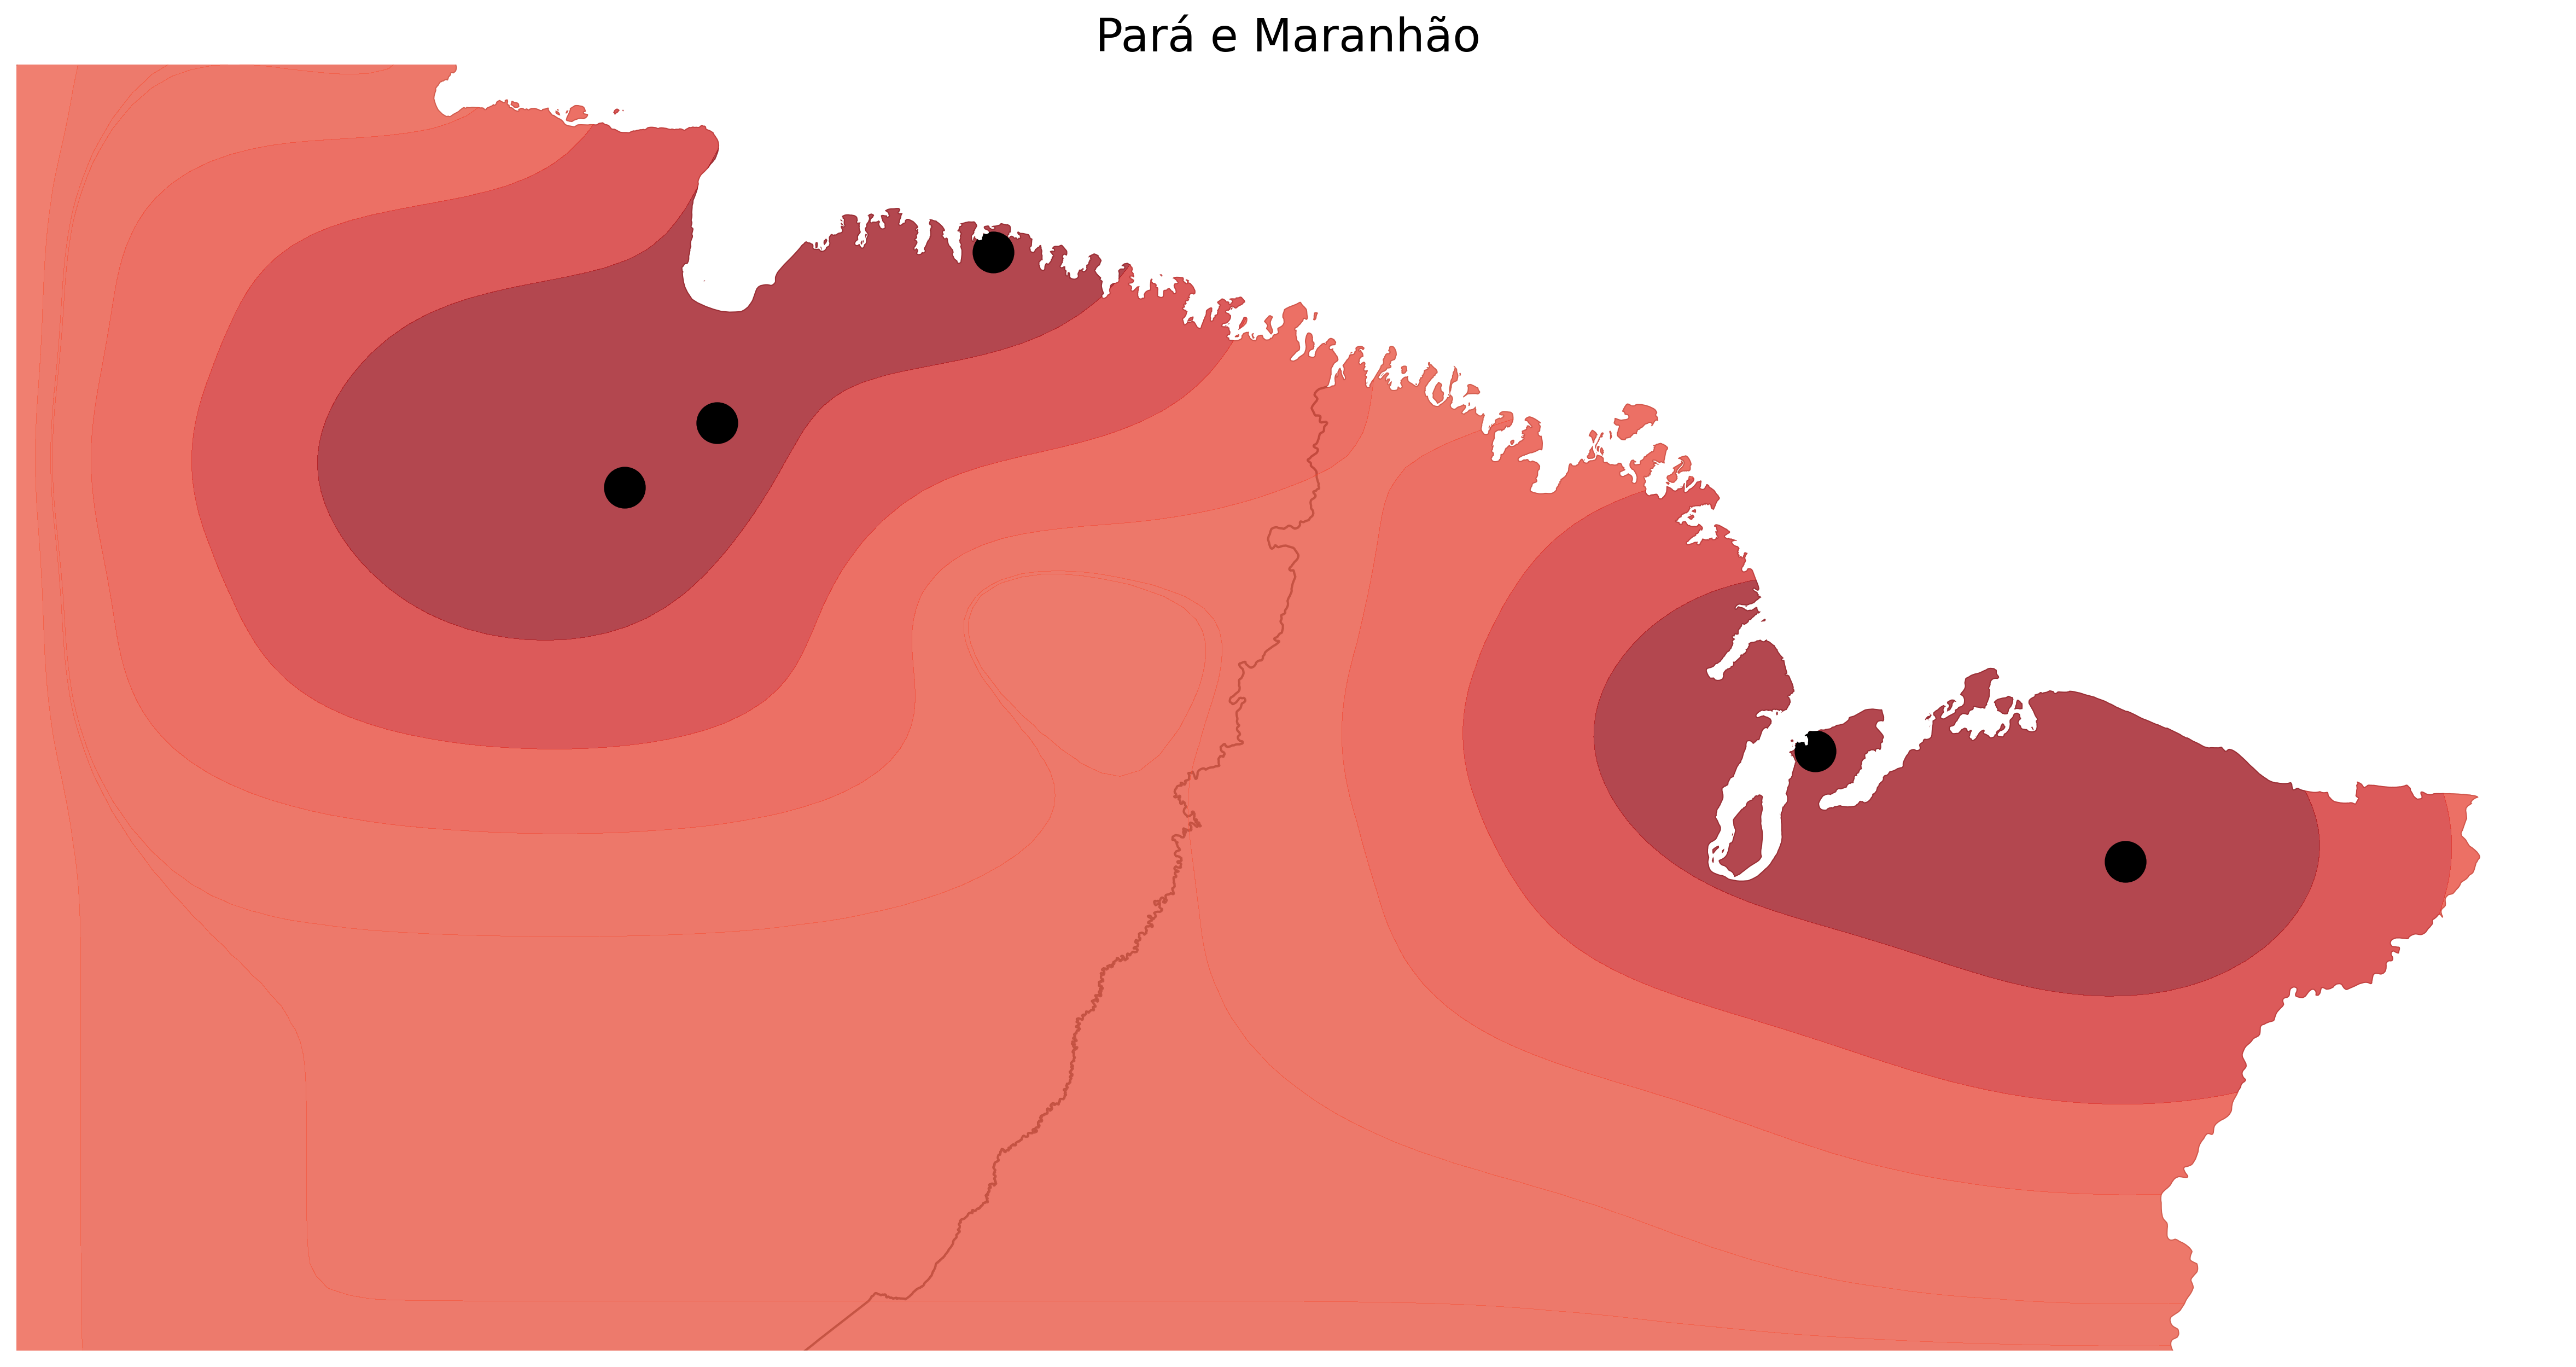

In [20]:
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)

xmin, xmax, ymin, ymax = -51, -41.5, -4.8, 0
citie_size = 300
map_color = "#a980a0"
edge_color = "#000000"

states.plot(facecolor = map_color, edgecolor = edge_color, ax = ax, alpha = 0.4)
gplt.kdeplot(tx, cmap="Reds", 
             shade=True, 
             clip = states, 
             ax=ax, alpha = 0.7
            )
cities.plot(ax = ax, color = '#000000', markersize = citie_size, categorical = False, legend = True)


ax.set_title("Pará e Maranhão", fontsize=20)
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))

# for i in range(1, len(coord)):
#    ax.annotate(str(coord['localidade'][i]), coord['x'][i], coord['y'][i])